## https://scikit-learn.org/stable/user_guide.html

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("D:/Datasets/Advertising.csv")

# Veri Keşfi

In [3]:
df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Veri setini X ve y olarak ayırma (Dikey bölme)

<h3 style="color:red";> Bir önceki notebookta ilk modelde Newspaper anlamsıdı bu sepeble burada onu modele dahil etmiyoruz.</h3>

In [4]:
# Nitelikler matrisi (feature matrix) Sales hedef değişken en son indekste, onu ve ID numarasını da hariç tutalım
X = df.iloc[:,[1,2]].values
X.shape

(200, 2)

In [5]:
type(X)

numpy.ndarray

In [6]:
# Sales hedef değişken en son indekste
y = df.iloc[:,-1].values
y.shape

(200,)

In [7]:
type(y)

numpy.ndarray

# Veri setini train-test olarak ayırma (yatay bölme)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
            test_size=0.25, random_state = 142)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 2)
(50, 2)
(150,)
(50,)


# Lineer Regresyon Nesnesi Oluşturma (Boş model yaratma)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
regressor = LinearRegression()

# Lineer modeli eğitme (modeli şekillendirme - veriye uydurma - eğitme)

In [12]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Eğitilmiş modelle (makine) test seti kullanarak tahmin 

In [13]:
y_pred = regressor.predict(X_test)

## Tahmin sonuçlarını numpy.ndarray'den dataframe yapma (İncelemek daha Kolay)

In [14]:
predictions = pd.DataFrame(data=y_pred,    # values
                index=range(len(y_pred)),    # 1st column as index
                   columns=['y_pred'])  # 1st row as the column names

# Sadece y_pred'den oluşan df'e test(gerçek) y_test'i sütun olarak ekleme
predictions['y_test'] = y_test
predictions.head()

,y_pred,y_test
0,15.671580,12.0
1,11.057081,8.0
2,10.846796,6.6
3,18.393377,19.0
4,24.914145,27.0


# Regression metrics

## explained_variance

In [15]:
# The sklearn.metrics module implements several loss, score, and utility functions to measure 
# regression performance. Some of those have been enhanced to handle the multioutput case: 
# mean_squared_error, mean_absolute_error, explained_variance_score and r2_score.

In [16]:
from sklearn.metrics import explained_variance_score

In [17]:
explained_variance_score(y_true=y_test, y_pred=y_pred)

0.8531184597917796

## mean_absolute_error

In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
mean_absolute_error(y_true=y_test, y_pred=y_pred)

1.370987217348666

## r2_score 

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(y_test, y_pred)

0.8374726065469351

## mean_squared_error

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)

In [29]:
mse

4.093012513682703

# root_mean_squared_error

In [33]:
import math
rmse = math.sqrt(mse)
rmse

2.02311950059375

# Model Anlamlılığı 

In [34]:
# Scikit-learn model anlamlılığı için bir araç sunmuyor. Bu sebeple statsmodel modülünü kullanacağız

In [35]:
# !pip install statsmodels

In [36]:
# !pip install patsy

In [37]:
import statsmodels.api as sm

In [38]:
# Sabit Ekleme (aslında sbitin önünde bir tane x üzeri 0 var. Onu temsilen yeni bir sütunu 1'ler ile dolduruyoruz)

In [39]:
X = sm.add_constant(X)

In [40]:
X.shape

(200, 3)

In [41]:
X[:10]

array([[  1. , 230.1,  37.8],
       [  1. ,  44.5,  39.3],
       [  1. ,  17.2,  45.9],
       [  1. , 151.5,  41.3],
       [  1. , 180.8,  10.8],
       [  1. ,   8.7,  48.9],
       [  1. ,  57.5,  32.8],
       [  1. , 120.2,  19.6],
       [  1. ,   8.6,   2.1],
       [  1. , 199.8,   2.6]])

In [42]:
reg_OLS_model = sm.OLS(endog=y, exog=X).fit()

In [43]:
reg_OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 16 Nov 2019   Prob (F-statistic):           4.83e-98
Time:                        07:04:59   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
x1             0.0458      0.001     32.909      0.000       0.043       0.048
x2             0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# const: Sabit
# x1: TV
# x2: Radio

# Tüm p değerleri < 0.05 olduğundan ve F istatistiğinin de p değeri < 0.05 olduğundan model anlamlıdır diyebiliriz.
# En az bir değişkenin p değeri < 0.05 ise F istatistiği de < 0.05 ve anlamlı olur. Ancak modele katkısı olmayan değişkenin
# modeli karmaşık hale getirmek ve gerçek tahminleyicileri (predictors) örtmek dışında bir işlevi olmayacağından çıkarmalıyız.


<h1 style="color:green";>Model tamamdır </h1>

# ========= Grafik ===========

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# Eğitim verisi üzerinde yapılan tahminler
y_train_pred = regressor.predict(X_train)

## Eğitim Verileri ile

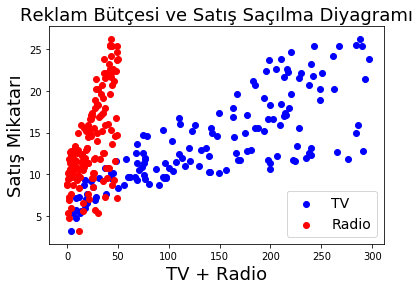

In [41]:
plt.figure(figsize=(6,4))
plt.scatter(X_train[:,0], y_train, color='blue', label="TV")
# plt.plot(X_train[:,0], y_train, color='blue', label="TV")

plt.scatter(X_train[:,1], y_train, color='red', label="Radio")
# plt.plot(X_train[:,1], y_train, color='red', label="Radio")


plt.legend(loc='lower right', fontsize=14)
plt.title("Reklam Bütçesi ve Satış Saçılma Diyagramı", fontsize=18)
plt.xlabel("TV + Radio", fontsize=18)
plt.ylabel("Satış Mikatarı", fontsize=18)
plt.show()

<h1 style="color:blue";>08_linear_regression_alıştırma - 2</h1>

In [ ]:
# Sirket_Harcama_Kar_Bilgileri.csv veriseti ile 
# karı tahmin eden çoklu regresyon modeli kurunuz.

# =========    Elle yapılan hesaplamalar (Opsiyonel)     ===========

# Prediction errors

In [33]:
# Tahmin değerleri ile gerçek değerler arasındaki mesafesinin mutlak değeri
predictions['pred_error'] = abs(predictions.y_test - predictions.y_pred)
predictions.head()

,y_pred,y_test,pred_error
0,15.671580,12.0,3.671580
1,11.057081,8.0,3.057081
2,10.846796,6.6,4.246796
3,18.393377,19.0,0.606623
4,24.914145,27.0,2.085855


# Ortalamaya karşı hatalar

In [34]:
# Gerçek değerler ile ortalama arasındaki mesafesinin mutlak değeri
import math
predictions['mean_error'] = abs(predictions['y_test'] - predictions['y_test'].mean())
predictions.head()

,y_pred,y_test,pred_error,mean_error
0,15.671580,12.0,3.671580,2.426
1,11.057081,8.0,3.057081,6.426
2,10.846796,6.6,4.246796,7.826
3,18.393377,19.0,0.606623,4.574
4,24.914145,27.0,2.085855,12.574


## Hataların Karesini Almak

In [35]:
predictions["pred_error_square"] = predictions['pred_error'] ** 2
predictions["mean_error_square"] = predictions['mean_error'] ** 2
predictions.head()

,y_pred,y_test,pred_error,mean_error,pred_error_square,mean_error_square
0,15.671580,12.0,3.671580,2.426,13.480500,5.885476
1,11.057081,8.0,3.057081,6.426,9.345746,41.293476
2,10.846796,6.6,4.246796,7.826,18.035278,61.246276
3,18.393377,19.0,0.606623,4.574,0.367992,20.921476
4,24.914145,27.0,2.085855,12.574,4.350793,158.105476


# rmse elle hesaplama

In [36]:
from math import sqrt
rmse = sqrt(sum(predictions['pred_error_square']) / len(predictions['pred_error_square']))
rmse

2.02311950059375

## r2_score el ile hesaplama

In [37]:
variace_mean_error = sum(predictions['mean_error_square']) / len(predictions['mean_error_square'])
variance_pred_error = sum(predictions['pred_error_square']) / len(predictions['pred_error_square'])

r_2 = 1- (variance_pred_error/variace_mean_error)
r_2

0.8374726065469351

# explained variance

In [38]:
import statistics
# explained_variance(y, y^) = 1 - (Var(y-y^) / Var(y))
variance_y_test = statistics.variance(predictions['y_test'])
variance_y_y_pred = statistics.variance((predictions['y_test'] / predictions['y_pred']))
expln_var = 1 - (variance_pred_error/ variance_y_test)
expln_var

0.8407231544159963

# İlave Bilgi (Opsiyonel)

# Değişken Seçmenin Diğer Yöntemi

In [42]:
X2 = df[['TV','Radio']].values
X2.shape

(200, 2)

In [43]:
type(X2)

numpy.ndarray

In [44]:
y2 = df[['Sales']].values

In [45]:
type(y2)

numpy.ndarray